In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Resize các ảnh đầu vào về cùng kích thước

In [7]:
bg1_image = cv2.imread('GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

Xây dựng hàm compute_difference()

In [8]:
def compute_difference(bg_img, input_img):
    difference_single_channel = cv2.absdiff(bg_img, input_img)
    return difference_single_channel

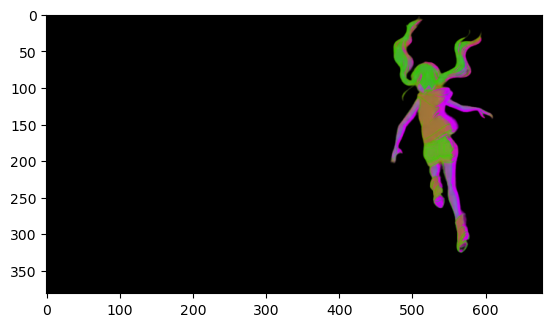

In [9]:
difference_single_channel = compute_difference(bg1_image, ob_image)
plt.imshow(difference_single_channel)
plt.show()

Xây dựng hàm compute_binary_mask()

In [30]:
def compute_binary_mask(difference_single_channel):
  difference_binary = np.where(difference_single_channel < 10, 0, 255)
  return difference_binary

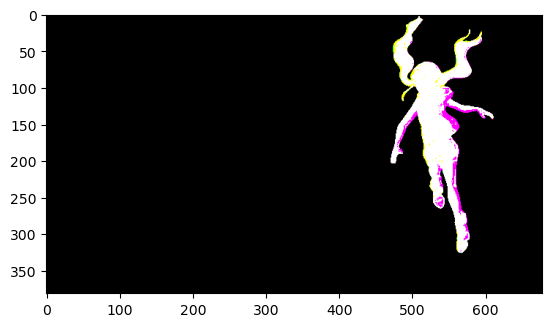

In [31]:
difference_binary = compute_binary_mask(difference_single_channel)
# rgb_difference_binary = cv2.cvtColor(difference_binary, cv2.COLOR_BGR2RGB)
plt.imshow(difference_binary)
plt.show()

Xây dựng hàm replace_background()

In [32]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)
    output = np.where(binary_mask == 255, ob_image, bg2_image)
    return output

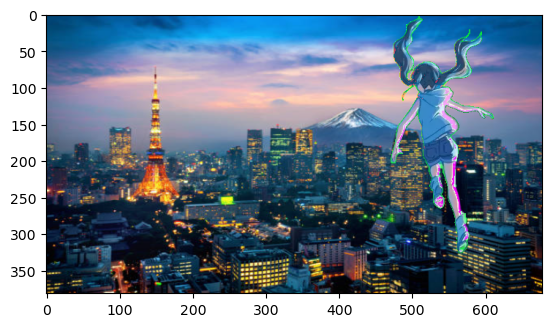

In [13]:
background_subtraction = replace_background(bg1_image, bg2_image, ob_image)
rgb_background_subtraction = cv2.cvtColor(background_subtraction, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_background_subtraction)
plt.show()

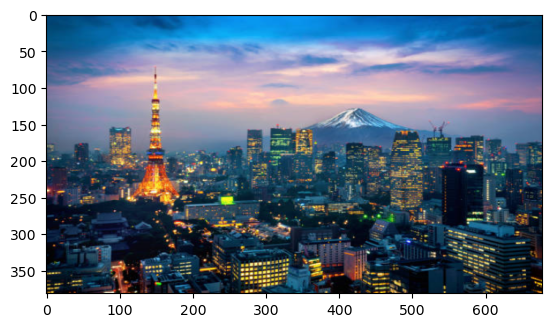

In [14]:
rgb_bg2_image = cv2.cvtColor(bg2_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_bg2_image)
plt.show()